In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../features.csv")
df.head()

,content_hash,difficulty_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,...,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio,mel_rms_mean,mel_rms_std,spectral_centroid_mean
0,0006ec38aac643a5,0,0,234.033923,1.715760,0.565870,0.134545,2.594404,2.459859,0.0,...,1705.0,0.153846,0.000000,1.131019,0.993590,0.224359,0.000000,1.715760,0.565870,49.109248
1,000964b8f367c35e,1,0,234.289342,1.612189,0.821523,0.178069,3.146025,2.967956,0.0,...,850.0,0.294821,0.406375,1.468277,0.996016,0.258964,0.000000,1.612189,0.821523,59.742395
2,000c4af5d5bec963,1,0,242.671746,1.708115,0.521088,0.098820,2.711086,2.612266,0.0,...,660.0,1.000000,0.524823,1.375248,0.000000,0.106383,0.000000,1.708115,0.521088,49.813262
3,000fe00525608837,2,0,236.634558,1.537410,0.676382,0.083541,2.252272,2.168731,0.0,...,420.0,0.188925,0.257329,1.487742,0.000000,0.097720,0.000000,1.537410,0.676382,58.875594
4,000ffa0d50f36aa3,2,0,315.501134,1.718080,0.304838,0.021539,2.463232,2.441693,0.0,...,350.0,0.093357,0.160682,1.591153,0.000000,0.498205,0.009874,1.718080,0.304838,55.960815


In [3]:
df.info()
df.describe(include="all").T

<class 'pandas.DataFrame'>
RangeIndex: 23854 entries, 0 to 23853
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   content_hash              23854 non-null  str    
 1   difficulty_id             23854 non-null  int64  
 2   instrument_id             23854 non-null  int64  
 3   duration_sec              23854 non-null  float64
 4   rms_energy_mean           23854 non-null  float64
 5   rms_energy_std            23854 non-null  float64
 6   amplitude_envelope_min    23854 non-null  float64
 7   amplitude_envelope_max    23854 non-null  float64
 8   amplitude_envelope_range  23854 non-null  float64
 9   tempo_bpm                 23854 non-null  float64
 10  n_notes                   23854 non-null  int64  
 11  notes_per_second_mean     23854 non-null  float64
 12  inter_note_ms_mean        23854 non-null  float64
 13  inter_note_ms_std         23854 non-null  float64
 14  inter_note_ms_med

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
content_hash,23854,23854,0006ec38aac643a5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty_id,23854.0,NaN,NaN,NaN,1.535633,1.128094,0.0,1.0,2.0,3.0,3.0
instrument_id,23854.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
duration_sec,23854.0,NaN,NaN,NaN,242.523319,79.202046,28.676644,197.752744,231.131429,271.22068,1224.260499
rms_energy_mean,23854.0,NaN,NaN,NaN,1.74274,0.366682,1.318888,1.620983,1.695483,1.802747,42.671696
rms_energy_std,23854.0,NaN,NaN,NaN,0.653043,2.073949,0.242197,0.459144,0.56265,0.710974,296.106812
amplitude_envelope_min,23854.0,NaN,NaN,NaN,0.09973,0.081648,0.000678,0.044455,0.079095,0.132459,0.755208
amplitude_envelope_max,23854.0,NaN,NaN,NaN,3.328372,34.345299,1.728085,2.394615,2.705657,3.207265,5187.204102
amplitude_envelope_range,23854.0,NaN,NaN,NaN,3.228642,34.339036,1.67519,2.31133,2.615196,3.105862,5186.601997
tempo_bpm,23854.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
summary = {
    "rows": len(df),
    "unique_charts": df["content_hash"].nunique(),
    "difficulties": sorted(df["difficulty_id"].unique().tolist()),
    "instruments": sorted(df["instrument_id"].unique().tolist()),
}
summary

{'rows': 23854,
 'unique_charts': 23854,
 'difficulties': [0, 1, 2, 3],
 'instruments': [0]}

In [5]:
pd.crosstab(df["difficulty_id"], df["instrument_id"])

instrument_id,0
difficulty_id,
0,5823
1,5819
2,5824
3,6388


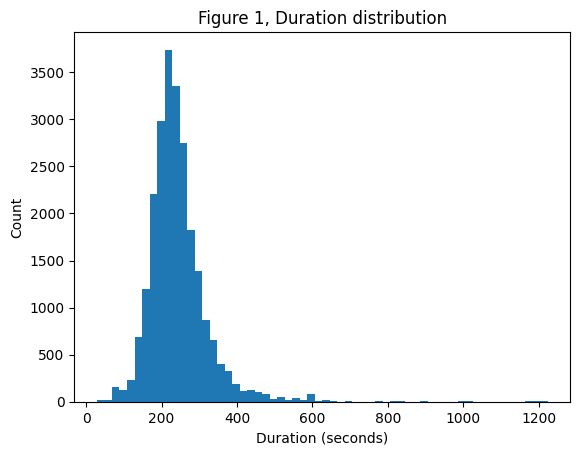

In [6]:
plt.hist(df["duration_sec"].dropna(), bins=60)
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Figure 1, Duration distribution")
plt.show()

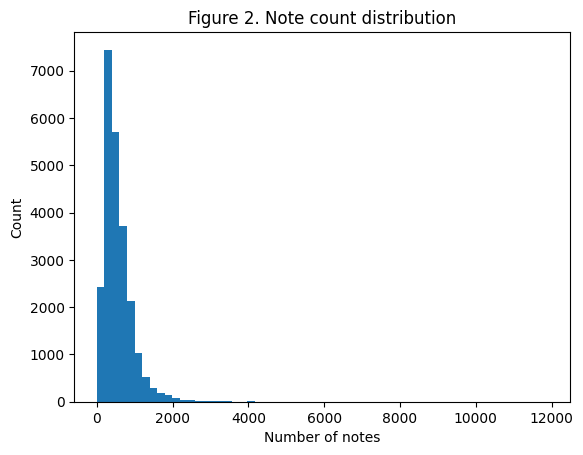

In [7]:
plt.hist(df["n_notes"].dropna(), bins=60)
plt.xlabel("Number of notes")
plt.ylabel("Count")
plt.title("Figure 2. Note count distribution")
plt.show()

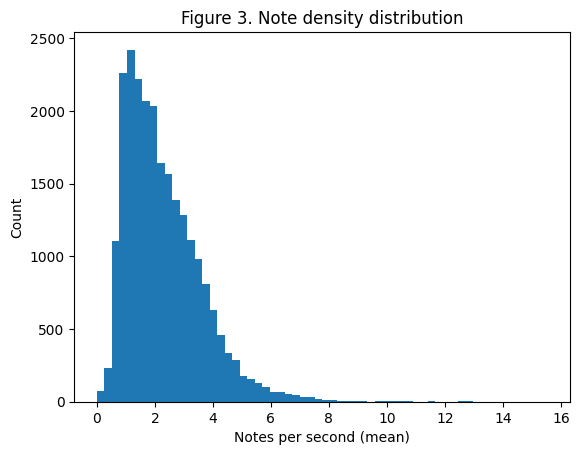

In [8]:
plt.hist(df["notes_per_second_mean"].dropna(), bins=60)
plt.xlabel("Notes per second (mean)")
plt.ylabel("Count")
plt.title("Figure 3. Note density distribution")
plt.show()

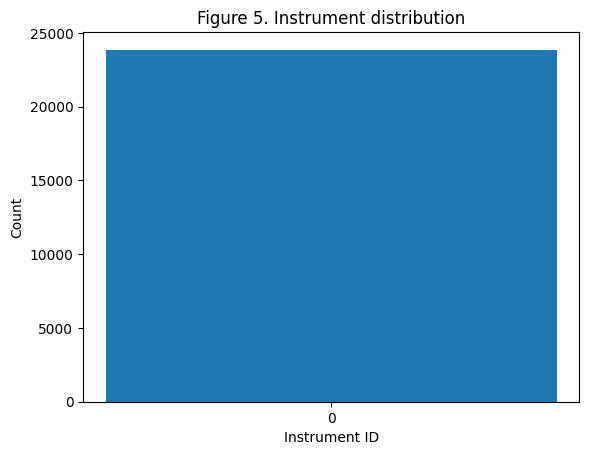

In [9]:
counts = df["instrument_id"].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Instrument ID")
plt.ylabel("Count")
plt.title("Figure 5. Instrument distribution")
plt.show()


C:\Users\Susan\AppData\Local\Temp\ipykernel_7584\422540557.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)


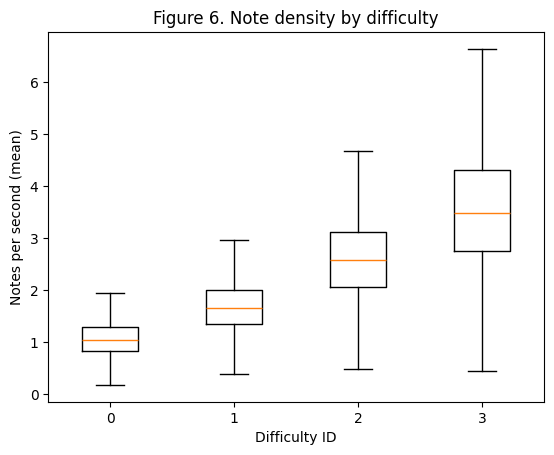

In [10]:
diffs = sorted(df["difficulty_id"].unique())
groups = [df.loc[df["difficulty_id"] == d, "notes_per_second_mean"].dropna() for d in diffs]

plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)
plt.xlabel("Difficulty ID")
plt.ylabel("Notes per second (mean)")
plt.title("Figure 6. Note density by difficulty")
plt.show()


C:\Users\Susan\AppData\Local\Temp\ipykernel_7584\1086473112.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)


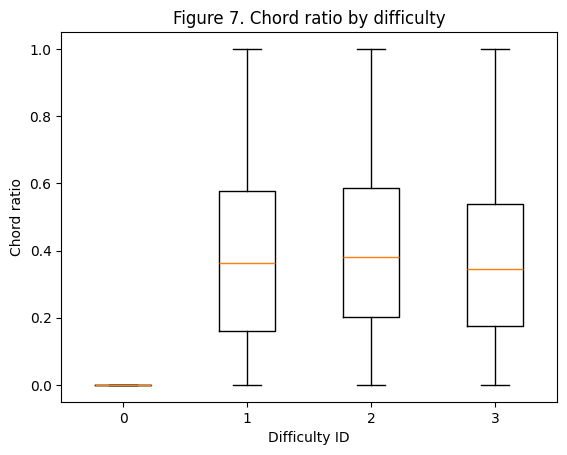

In [11]:
groups = [df.loc[df["difficulty_id"] == d, "chord_ratio"].dropna() for d in diffs]

plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)
plt.xlabel("Difficulty ID")
plt.ylabel("Chord ratio")
plt.title("Figure 7. Chord ratio by difficulty")
plt.show()


C:\Users\Susan\AppData\Local\Temp\ipykernel_7584\3388020388.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)


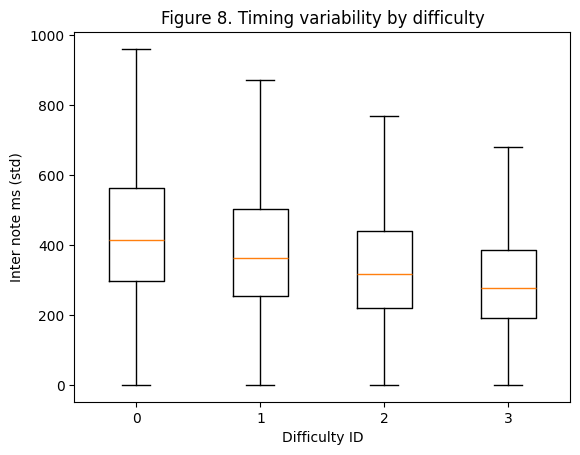

In [12]:
groups = [df.loc[df["difficulty_id"] == d, "inter_note_ms_std"].dropna() for d in diffs]

plt.boxplot(groups, labels=[str(d) for d in diffs], showfliers=False)
plt.xlabel("Difficulty ID")
plt.ylabel("Inter note ms (std)")
plt.title("Figure 8. Timing variability by difficulty")
plt.show()


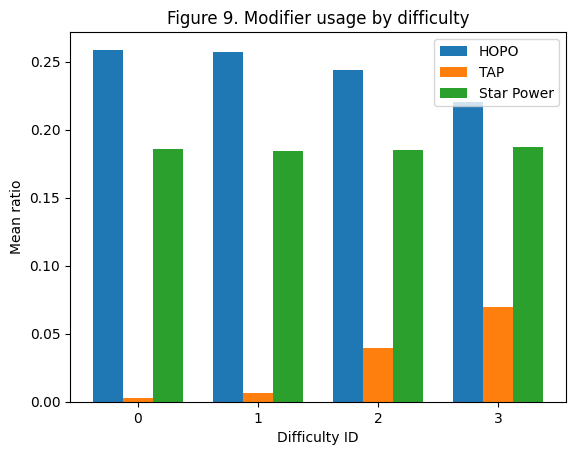

In [13]:


mod_means = df.groupby("difficulty_id")[["hopo_ratio","tap_ratio","star_power_ratio"]].mean().sort_index()

x = np.arange(len(mod_means.index))
w = 0.25

plt.bar(x - w, mod_means["hopo_ratio"].values, width=w, label="HOPO")
plt.bar(x,     mod_means["tap_ratio"].values,  width=w, label="TAP")
plt.bar(x + w, mod_means["star_power_ratio"].values, width=w, label="Star Power")

plt.xticks(x, [str(i) for i in mod_means.index])
plt.xlabel("Difficulty ID")
plt.ylabel("Mean ratio")
plt.title("Figure 9. Modifier usage by difficulty")
plt.legend()
plt.show()


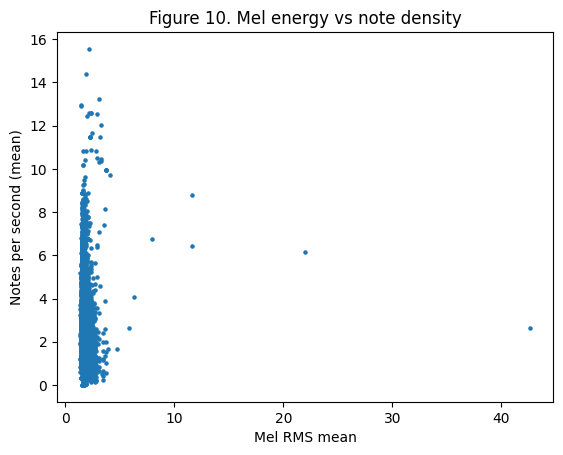

In [14]:
x = df["mel_rms_mean"]
y = df["notes_per_second_mean"]

mask = x.notna() & y.notna()
plt.scatter(x[mask], y[mask], s=5)
plt.xlabel("Mel RMS mean")
plt.ylabel("Notes per second (mean)")
plt.title("Figure 10. Mel energy vs note density")
plt.show()


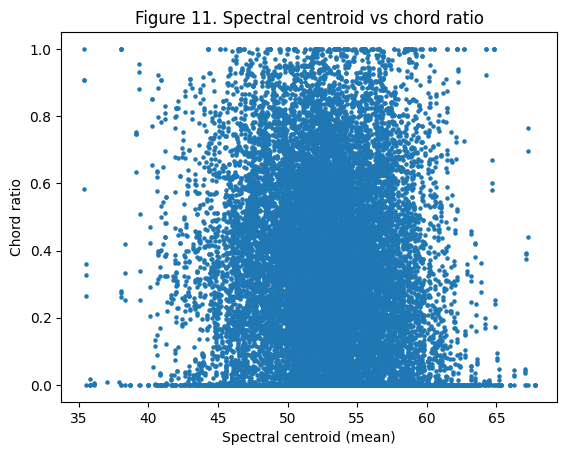

In [15]:
x = df["spectral_centroid_mean"]
y = df["chord_ratio"]

mask = x.notna() & y.notna()
plt.scatter(x[mask], y[mask], s=5)
plt.xlabel("Spectral centroid (mean)")
plt.ylabel("Chord ratio")
plt.title("Figure 11. Spectral centroid vs chord ratio")
plt.show()


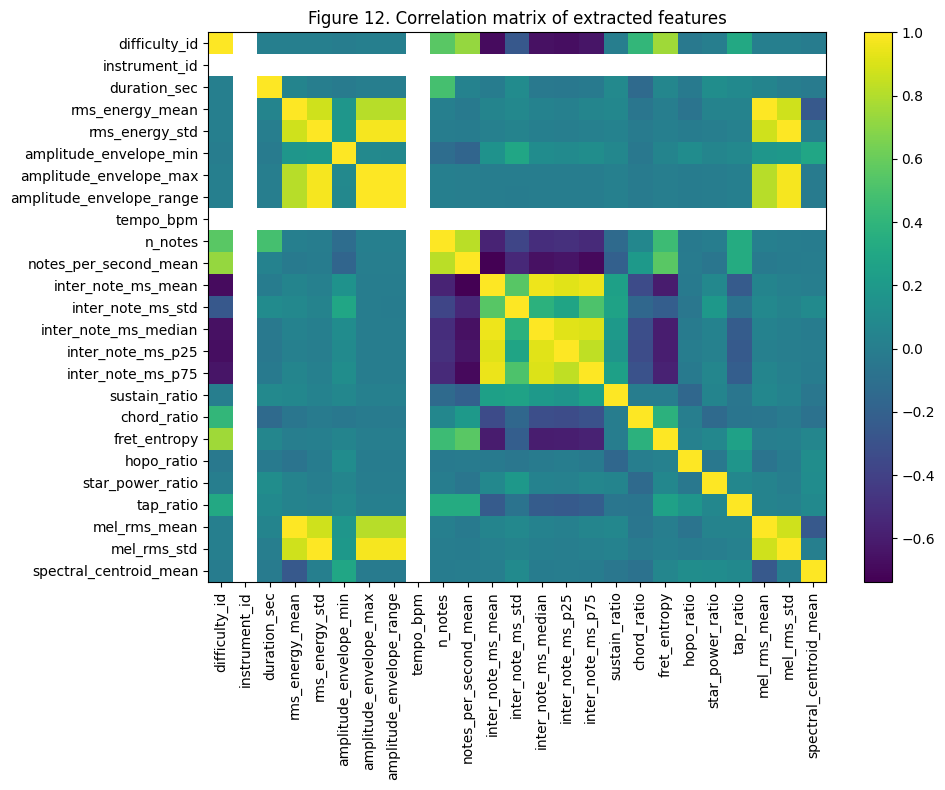

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr.values, aspect="auto")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.title("Figure 12. Correlation matrix of extracted features")
plt.tight_layout()
plt.show()


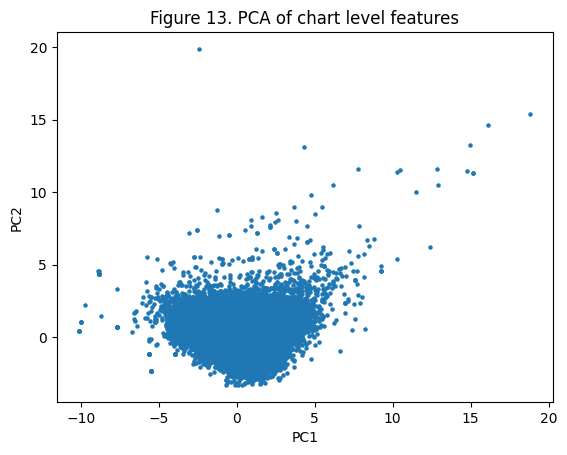

In [17]:
feature_cols = [
    "duration_sec","tempo_bpm","n_notes","notes_per_second_mean",
    "inter_note_ms_mean","inter_note_ms_std","sustain_ratio","chord_ratio",
    "fret_entropy","hopo_ratio","tap_ratio","star_power_ratio",
    "mel_rms_mean","spectral_centroid_mean"
]

X = df[feature_cols].replace([np.inf, -np.inf], np.nan).dropna()
Xz = StandardScaler().fit_transform(X.values)
Z = PCA(n_components=2, random_state=0).fit_transform(Xz)

plt.scatter(Z[:, 0], Z[:, 1], s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Figure 13. PCA of chart level features")
plt.show()

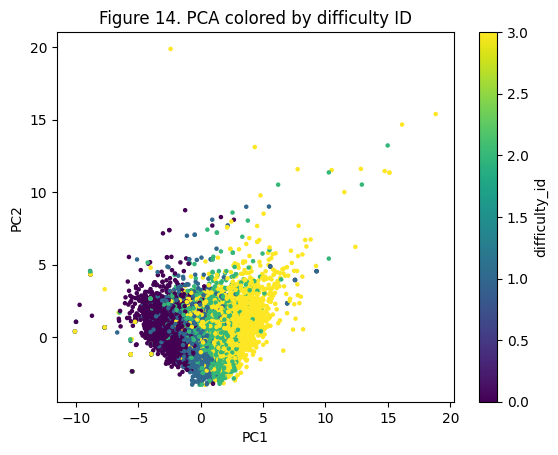

In [18]:
d = df.loc[X.index, "difficulty_id"].values
plt.scatter(Z[:, 0], Z[:, 1], c=d, s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Figure 14. PCA colored by difficulty ID")
plt.colorbar(label="difficulty_id")
plt.show()